# project todo

<span style="color:green">handle missing data.</span>

<span style="color:green">remove outliers using z-score or IQR</span>

<span style="color:green">Correct non-linear relationships through transforming variables</span>

plot studentized residuals and cooks distance for outliers & high leverage points, & influential points

<span style="color:green">Checked and corrected multicollinearity</span>

<span style="color:green">created interaction terms. ensure right amount of interaction terms by plotting train and test error
</span>

<span style="color:green">used l1,l2,elastic net regularization to combat overfitting and compare with base linear regression
</span>

<span style="color:green">used cross validation,
</span> 

<span style="color:green">used grid search to find optimal parameters for regularization, ,
</span> 

<span style="color:green">scaled features.
</span>

<span style="color:green">anova and t test for feature selection
</span>

<span style="color:green">check for r^2 and other metrics
</span>

<span style="color:green">plot residual plots, check for heteroscedasticty (residual plot has funnel shape, breuch pagan)
</span>

Shapiro Wilks Test


1. Linearity
The assumption of linearity states that there is a linear relationship between the predictors and the response variable.

How to Test:

Scatter Plots: Plot scatter plots between each predictor and the response variable. Look for a linear pattern. Non-linear relationships may appear as curved patterns.
Partial Regression Plots: In Python, you can use the statsmodels library to create partial regression plots that help isolate the relationship between each predictor and the response, controlling for other variables.

2. Homoscedasticity
Homoscedasticity means the residuals should have equal variance across the regression line.

How to Test:

Residual vs. Fitted Values Plot: Plot the residuals on the y-axis and the fitted values (predicted values) on the x-axis. Look for a random spread of residuals across all levels of fitted values without any discernible pattern (no funnel or cone-shaped patterns).
Breusch-Pagan Test: Use statistical tests such as the Breusch-Pagan test from the statsmodels library to formally test for homoscedasticity.

3. Normality of Residuals
This assumption is that the residuals of the model are normally distributed.

How to Test:

Histogram of Residuals: Plotting a histogram of the residuals can give a quick indication if they are normally distributed.
Q-Q Plot: A Quantile-Quantile plot compares the distribution of residuals to a normal distribution. Any significant deviations from the line indicate departures from normality.
Shapiro-Wilk Test: This is a formal test for normality. It can be performed in Python using the scipy.stats library.

4. Independence of Errors
The residuals should not be correlated; the presence of correlation typically indicates that there is information in the residuals which should be explained by the model.

How to Test:

Durbin-Watson Test: This test is used to detect the presence of autocorrelation in the residuals of a regression. A Durbin-Watson statistic close to 2.0 suggests no autocorrelation. Values deviating substantially from 2.0 may indicate positive or negative autocorrelation.
Plot of Residuals: Plotting residuals against time or the order of the data collection can sometimes show patterns indicating autocorrelation.

i transformed y and feature variables due to skewness, used qqplots to compare normality, used scatterplots to check for linear relationships, removed outliers using iqr and z-scores, used heatmap to compare correlation of transformed versus original features against target variable, used one-hot encoding for cities, addressed multicollinearity using VIF, standardized features, used t and f test for feature selection, used stepwise selection for model selection, used polynomial features for interaction terms and found the right degree by visually inspecting the train and test error as degree increases, tested for overfitting by comparing train and test error, compared performance of lasso and ridge regression to combat overfitting and used grid search to find optimal parameter, used 5-fold cross validation, plotted residual plot to check for homoscedasticity and used Breusch-Pagan test, and used Durbin-Watson Test to test for autocorrelation in residuals 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from scipy.stats import boxcox_normmax, boxcox
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from scipy.special import inv_boxcox
pd.set_option('display.max_columns', None)

In [2]:
fitted_y_lambda = -0.3472871178080531

In [3]:
df = pd.read_csv('final_data.csv')
df

,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,bedrooms,lng,lat,realSum_boxcox_transformed,dist_transformed,metro_dist_transformed,attr_index_transformed,rest_index_transformed,guest_satisfied,day_of_week_weekends,city_amsterdam,city_athens,city_barcelona,city_berlin,city_budapest,city_london,city_paris,city_rome,city_vienna
0,0,1,2.0,0,1,0,1,4.90569,52.41772,2.417335,1.990728,0.908426,5.380384,7.801768,0,0,1,0,0,0,0,0,0,0,0
1,0,1,4.0,0,0,0,1,4.90005,52.37432,2.500767,-0.655784,-1.487343,8.821467,15.061885,0,0,1,0,0,0,0,0,0,0,0
2,0,1,2.0,0,0,1,1,4.97512,52.36103,2.464258,2.196604,1.250092,5.314048,7.722939,0,0,1,0,0,0,0,0,0,0,0
3,0,1,4.0,0,0,1,2,4.89417,52.37663,2.529912,-0.848888,-0.840104,8.378551,15.249095,0,0,1,0,0,0,0,0,0,0,0
4,0,1,2.0,1,0,0,1,4.90051,52.37508,2.543402,-0.563333,-1.180276,8.582092,14.949837,1,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49574,0,0,6.0,0,0,1,3,16.37940,48.21136,2.585798,-0.586505,-2.113293,6.992223,12.512150,1,1,0,0,0,0,0,0,0,0,1
49575,0,0,2.0,0,0,0,1,16.38070,48.20296,2.484416,-0.204996,-2.445350,6.880455,11.621469,0,1,0,0,0,0,0,0,0,0,1
49576,0,0,2.0,0,0,0,1,16.38568,48.20460,2.573667,-0.005962,-1.669086,6.567995,10.964002,0,1,0,0,0,0,0,0,0,0,1
49577,0,1,2.0,0,0,0,1,16.34100,48.19200,2.482718,1.284618,-1.290526,5.879413,9.147619,0,1,0,0,0,0,0,0,0,0,1


In [4]:
X = df.drop(['realSum_boxcox_transformed'], axis = 1)
y = df['realSum_boxcox_transformed']
X

,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,bedrooms,lng,lat,dist_transformed,metro_dist_transformed,attr_index_transformed,rest_index_transformed,guest_satisfied,day_of_week_weekends,city_amsterdam,city_athens,city_barcelona,city_berlin,city_budapest,city_london,city_paris,city_rome,city_vienna
0,0,1,2.0,0,1,0,1,4.90569,52.41772,1.990728,0.908426,5.380384,7.801768,0,0,1,0,0,0,0,0,0,0,0
1,0,1,4.0,0,0,0,1,4.90005,52.37432,-0.655784,-1.487343,8.821467,15.061885,0,0,1,0,0,0,0,0,0,0,0
2,0,1,2.0,0,0,1,1,4.97512,52.36103,2.196604,1.250092,5.314048,7.722939,0,0,1,0,0,0,0,0,0,0,0
3,0,1,4.0,0,0,1,2,4.89417,52.37663,-0.848888,-0.840104,8.378551,15.249095,0,0,1,0,0,0,0,0,0,0,0
4,0,1,2.0,1,0,0,1,4.90051,52.37508,-0.563333,-1.180276,8.582092,14.949837,1,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49574,0,0,6.0,0,0,1,3,16.37940,48.21136,-0.586505,-2.113293,6.992223,12.512150,1,1,0,0,0,0,0,0,0,0,1
49575,0,0,2.0,0,0,0,1,16.38070,48.20296,-0.204996,-2.445350,6.880455,11.621469,0,1,0,0,0,0,0,0,0,0,1
49576,0,0,2.0,0,0,0,1,16.38568,48.20460,-0.005962,-1.669086,6.567995,10.964002,0,1,0,0,0,0,0,0,0,0,1
49577,0,1,2.0,0,0,0,1,16.34100,48.19200,1.284618,-1.290526,5.879413,9.147619,0,1,0,0,0,0,0,0,0,0,1


In [5]:
# df.corr()['realSum_boxcox_transformed'][df.corr()['realSum_boxcox_transformed'].abs() > 0.1].index

In [7]:
def check_signifiance(X,y):
    X_with_const = sm.add_constant(X)
    model = sm.OLS(y, X_with_const).fit()
    print(model.summary())

In [8]:
check_signifiance(X,y)

                                OLS Regression Results                                
Dep. Variable:     realSum_boxcox_transformed   R-squared:                       0.682
Model:                                    OLS   Adj. R-squared:                  0.682
Method:                         Least Squares   F-statistic:                     4432.
Date:                        Sun, 07 Jul 2024   Prob (F-statistic):               0.00
Time:                                00:34:43   Log-Likelihood:                 80560.
No. Observations:                       49579   AIC:                        -1.611e+05
Df Residuals:                           49554   BIC:                        -1.608e+05
Df Model:                                  24                                         
Covariance Type:                    nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

### F-test p-value is less than 0.05, signifying that the entire model is statistically significant
### all individual variables have a p-value < 0.05, indicating they are statistically significant

In [9]:
def check_multicollinearity(X):
    pd.set_option('display.float_format', lambda x: '%.3f' % x)
    X_with_const = sm.add_constant(X)

    vif_data = pd.DataFrame()
    vif_data["feature"] = X_with_const.columns
    vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]
    
    print(vif_data)
    
       

In [10]:
check_multicollinearity(X)

                   feature         VIF
0                    const 3693012.443
1              room_shared       1.022
2             room_private       1.661
3          person_capacity       2.074
4        host_is_superhost       1.219
5                    multi       1.379
6                      biz       1.549
7                 bedrooms       1.593
8                      lng   79479.400
9                      lat   64209.797
10        dist_transformed       5.050
11  metro_dist_transformed       1.432
12  attr_index_transformed      11.812
13  rest_index_transformed      19.183
14         guest_satisfied       1.238
15    day_of_week_weekends       1.003
16          city_amsterdam   21011.270
17             city_athens   83115.743
18          city_barcelona    5978.038
19             city_berlin   33999.585
20           city_budapest   54373.457
21             city_london   62498.003
22              city_paris   35216.897
23               city_rome   57230.018
24             city_vienn

In [11]:
X = X.drop(['lat', 'lng'], axis=1)

In [12]:
check_signifiance(X,y)

                                OLS Regression Results                                
Dep. Variable:     realSum_boxcox_transformed   R-squared:                       0.680
Model:                                    OLS   Adj. R-squared:                  0.680
Method:                         Least Squares   F-statistic:                     4785.
Date:                        Sun, 07 Jul 2024   Prob (F-statistic):               0.00
Time:                                00:34:44   Log-Likelihood:                 80383.
No. Observations:                       49579   AIC:                        -1.607e+05
Df Residuals:                           49556   BIC:                        -1.605e+05
Df Model:                                  22                                         
Covariance Type:                    nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [13]:
check_multicollinearity(X)

                   feature     VIF
0                    const 200.750
1              room_shared   1.021
2             room_private   1.655
3          person_capacity   2.073
4        host_is_superhost   1.218
5                    multi   1.379
6                      biz   1.549
7                 bedrooms   1.593
8         dist_transformed   4.508
9   metro_dist_transformed   1.411
10  attr_index_transformed  11.670
11  rest_index_transformed  18.937
12         guest_satisfied   1.238
13    day_of_week_weekends   1.003
14          city_amsterdam   1.762
15             city_athens   2.813
16          city_barcelona   1.953
17             city_berlin   1.789
18           city_budapest   1.800
19             city_london   4.711
20              city_paris   3.501
21               city_rome   4.628
22             city_vienna   2.142


In [14]:
X['indices'] = X['rest_index_transformed']*X['attr_index_transformed']

In [15]:
X = X.drop(['rest_index_transformed', 'attr_index_transformed'], axis = 1)

In [16]:
check_signifiance(X,y)

                                OLS Regression Results                                
Dep. Variable:     realSum_boxcox_transformed   R-squared:                       0.678
Model:                                    OLS   Adj. R-squared:                  0.678
Method:                         Least Squares   F-statistic:                     4973.
Date:                        Sun, 07 Jul 2024   Prob (F-statistic):               0.00
Time:                                00:34:45   Log-Likelihood:                 80247.
No. Observations:                       49579   AIC:                        -1.605e+05
Df Residuals:                           49557   BIC:                        -1.603e+05
Df Model:                                  21                                         
Covariance Type:                    nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [17]:
check_multicollinearity(X)

                   feature    VIF
0                    const 65.451
1              room_shared  1.021
2             room_private  1.653
3          person_capacity  2.074
4        host_is_superhost  1.218
5                    multi  1.378
6                      biz  1.549
7                 bedrooms  1.592
8         dist_transformed  3.870
9   metro_dist_transformed  1.411
10         guest_satisfied  1.238
11    day_of_week_weekends  1.003
12          city_amsterdam  1.395
13             city_athens  2.088
14          city_barcelona  1.855
15             city_berlin  1.541
16           city_budapest  1.665
17             city_london  4.274
18              city_paris  3.303
19               city_rome  4.329
20             city_vienna  1.694
21                 indices  5.259


In [18]:
X = X.drop('host_is_superhost', axis = 1)

In [19]:
check_signifiance(X,y)

                                OLS Regression Results                                
Dep. Variable:     realSum_boxcox_transformed   R-squared:                       0.678
Model:                                    OLS   Adj. R-squared:                  0.678
Method:                         Least Squares   F-statistic:                     5222.
Date:                        Sun, 07 Jul 2024   Prob (F-statistic):               0.00
Time:                                00:34:47   Log-Likelihood:                 80247.
No. Observations:                       49579   AIC:                        -1.605e+05
Df Residuals:                           49558   BIC:                        -1.603e+05
Df Model:                                  20                                         
Covariance Type:                    nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [20]:
X

,room_shared,room_private,person_capacity,multi,biz,bedrooms,dist_transformed,metro_dist_transformed,guest_satisfied,day_of_week_weekends,city_amsterdam,city_athens,city_barcelona,city_berlin,city_budapest,city_london,city_paris,city_rome,city_vienna,indices
0,0,1,2.000,1,0,1,1.991,0.908,0,0,1,0,0,0,0,0,0,0,0,41.977
1,0,1,4.000,0,0,1,-0.656,-1.487,0,0,1,0,0,0,0,0,0,0,0,132.868
2,0,1,2.000,0,1,1,2.197,1.250,0,0,1,0,0,0,0,0,0,0,0,41.040
3,0,1,4.000,0,1,2,-0.849,-0.840,0,0,1,0,0,0,0,0,0,0,0,127.765
4,0,1,2.000,0,0,1,-0.563,-1.180,1,0,1,0,0,0,0,0,0,0,0,128.301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49574,0,0,6.000,0,1,3,-0.587,-2.113,1,1,0,0,0,0,0,0,0,0,1,87.488
49575,0,0,2.000,0,0,1,-0.205,-2.445,0,1,0,0,0,0,0,0,0,0,1,79.961
49576,0,0,2.000,0,0,1,-0.006,-1.669,0,1,0,0,0,0,0,0,0,0,1,72.012
49577,0,1,2.000,0,0,1,1.285,-1.291,0,1,0,0,0,0,0,0,0,0,1,53.783


### Check ideal degree for polynomial

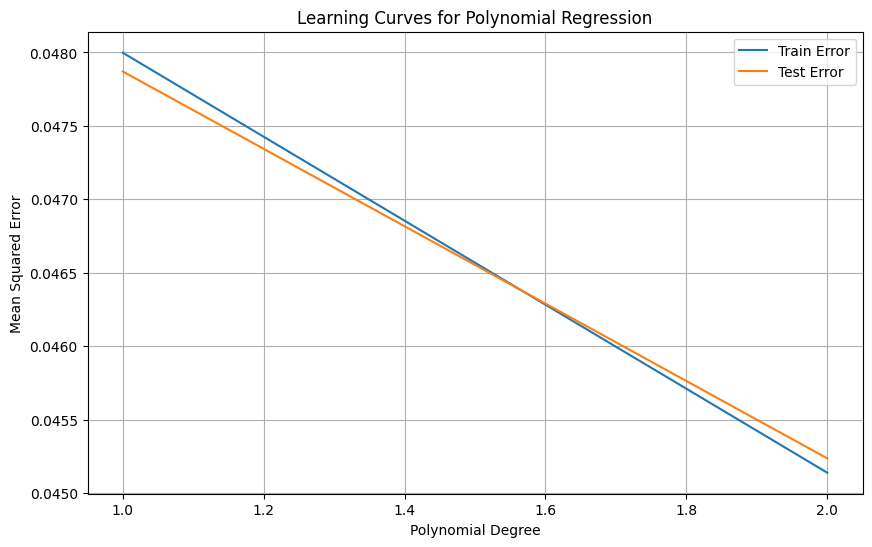

In [21]:
degrees = [1, 2]  
train_errors = []
test_errors = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

for degree in degrees:
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    scaler = StandardScaler()
    X_train_poly_scaled = scaler.fit_transform(X_train_poly)
    X_test_poly_scaled = scaler.transform(X_test_poly)

    model = LinearRegression(fit_intercept=True)
    model.fit(X_train_poly_scaled, y_train)

    train_preds = model.predict(X_train_poly_scaled)
    test_preds = model.predict(X_test_poly_scaled)
    train_errors.append(np.sqrt(mean_squared_error(y_train, train_preds)))
    test_errors.append(np.sqrt(mean_squared_error(y_test, test_preds)))
    
plt.figure(figsize=(10, 6))
plt.plot(range(1,3), train_errors, label='Train Error')
plt.plot(range(1,3), test_errors, label='Test Error')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curves for Polynomial Regression')
plt.legend()
plt.grid(True)
plt.show()


Say we have 4 features a,b,c,d. Polynomial features with degree = 2 will result in the original features, the squared features, and the pairwise products.
So, a,b,c,d,a^2,b^2,c^2,d^2,ab,ac,ad,bc,bd,cd = 14 features

### Linear Regression

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
poly_converter = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_converter.fit_transform(X_train)
X_test_poly = poly_converter.transform(X_test)

scaler = StandardScaler()
X_train_poly = scaler.fit_transform(X_train_poly)
X_test_poly = scaler.transform(X_test_poly)

model = LinearRegression()

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_train_poly, y_train, cv=kfold, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)

model.fit(X_train_poly, y_train)
train_preds = model.predict(X_train_poly)
test_preds = model.predict(X_test_poly)

train_error = np.sqrt(mean_squared_error(y_train, train_preds))
test_error = np.sqrt(mean_squared_error(y_test, test_preds))

print(f"Cross-Validation RMSE Scores: {cv_rmse_scores}")
print(f"Mean Cross-Validation RMSE: {cv_rmse_scores.mean()}")
print(f"Training RMSE: {train_error}")
print(f"Test RMSE: {test_error}")


Cross-Validation RMSE Scores: [0.04428171 0.0452933  0.04557135 0.04575174 0.04582517]
Mean Cross-Validation RMSE: 0.04534465376544959
Training RMSE: 0.045137652731862106
Test RMSE: 0.045235371120752856


In [23]:
train_r2 = r2_score(y_train, train_preds)
test_r2 = r2_score(y_test, test_preds)
print(train_r2)
print(test_r2)

0.7146451508225482
0.7141050092218961


<Axes: ylabel='realSum_boxcox_transformed'>

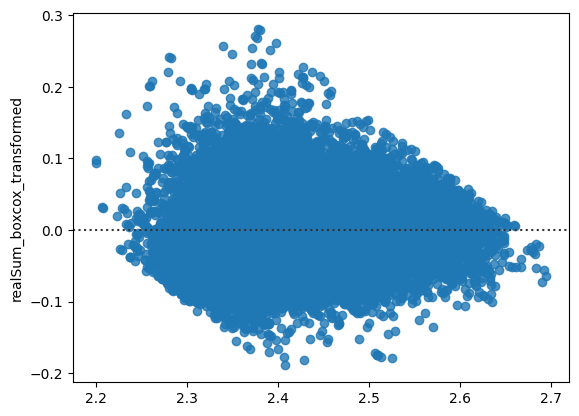

In [24]:
#plt.scatter(x = test_preds, y = residuals)
residuals = y_train - train_preds
residuals
sns.residplot(x=train_preds, y=residuals) 


In [25]:
transformed_train_preds = inv_boxcox(train_preds, fitted_y_lambda)
transformed_test_preds = inv_boxcox(test_preds, fitted_y_lambda)

transformed_train_predstransformed_train_preds = inv_boxcox(train_preds, fitted_y_lambda)
transformed_test_preds = inv_boxcox(test_preds, fitted_y_lambda)

print('Original train predictions', transformed_train_preds)
print('\n')
print('Original test predictions', transformed_test_preds)

Original train predictions [240.83335907 135.81890747 149.4084403  ... 204.19330185 556.99200998
 177.20237964]


Original test predictions [417.16356681 239.81401197 296.22362556 ... 199.41400877 219.84718144
 153.03722358]


In [26]:
original_train_y = inv_boxcox(y_train, fitted_y_lambda)
original_test_y = inv_boxcox(y_test, fitted_y_lambda)

original_train_error = np.sqrt(mean_squared_error(original_train_y, transformed_train_preds))
original_test_error = np.sqrt(mean_squared_error(original_test_y, transformed_test_preds))

print('Train RMSE in orignal units:', original_train_error)
print('Test RMSE in orignal units:', original_test_error)

Train RMSE in orignal units: 114.77118889371451
Test RMSE in orignal units: 115.50797683954754


In [27]:
comparative_errors = pd.DataFrame({
    'Metric': ['Test RMSE Base'],
    'Value': [original_test_error]
})
comparative_errors


,Metric,Value
0,Test RMSE Base,115.508


In [28]:
from statsmodels.stats.diagnostic import het_breuschpagan
X_train_poly_with_const = sm.add_constant(X_train_poly)
bp_test = het_breuschpagan(residuals, X_train_poly_with_const)
bp_test_statistic, bp_test_pvalue, _, _ = bp_test

print(f"Breusch-Pagan test statistic: {bp_test_statistic}")
print(f"Breusch-Pagan test p-value: {bp_test_pvalue}")


Breusch-Pagan test statistic: 2030.0883848017597
Breusch-Pagan test p-value: 3.609348580653953e-285


<Figure size 800x600 with 0 Axes>

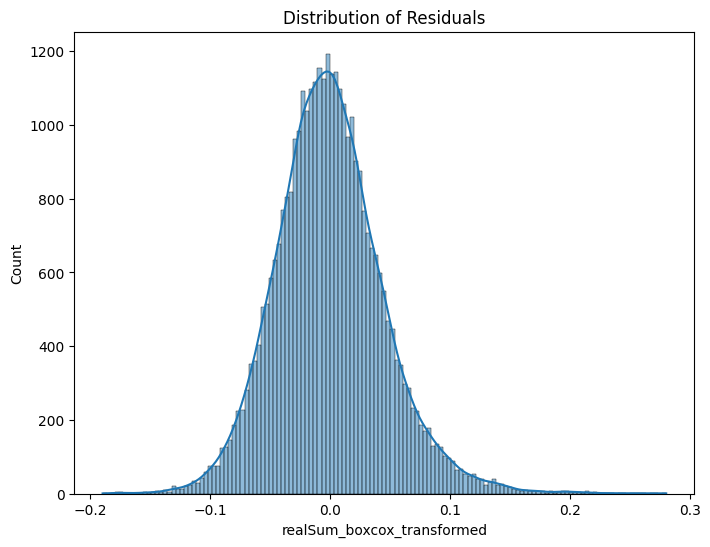

In [29]:
plt.figure(figsize=(8, 6))

# Residuals distribution plot
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.show()


### Ridge

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
poly_converter = PolynomialFeatures(degree = 2, include_bias=False)
X_train = poly_converter.fit_transform(X_train)
X_test = poly_converter.transform(X_test)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100]
}

ridge = Ridge()

grid_search = GridSearchCV(ridge, param_grid, cv=KFold(n_splits=5, shuffle=True, random_state=42), scoring='neg_mean_squared_error')


grid_search.fit(X_train, y_train)
ridge_alpha = grid_search.best_params_['alpha']
print(f"Best Alpha: {ridge_alpha}")

ridge_model = Ridge(alpha=ridge_alpha)
ridge_model.fit(X_train, y_train)

train_preds = ridge_model.predict(X_train)
test_preds = ridge_model.predict(X_test)

test_rmse = np.sqrt(mean_squared_error(y_test, test_preds))
train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))
print('Train RMSE', train_rmse)
print('Test RMSE', test_rmse)

Best Alpha: 0.1
Train RMSE 0.04505317209382939
Test RMSE 0.04512750723917821


In [31]:
train_r2 = r2_score(y_train, train_preds)
test_r2 = r2_score(y_test, test_preds)
print(train_r2)
print(test_r2)

0.7157123042390293
0.7154668186342175


<Axes: ylabel='realSum_boxcox_transformed'>

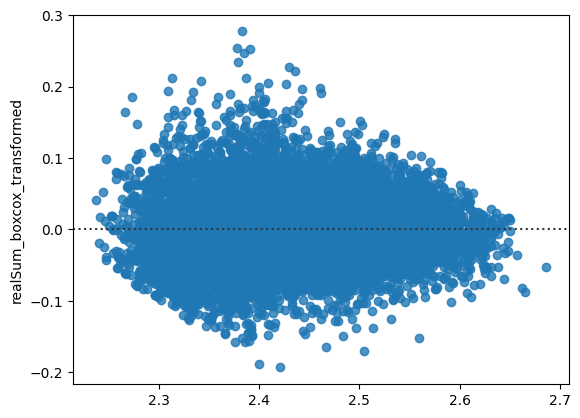

In [32]:
residuals = y_test - test_preds
sns.residplot(x=test_preds, y=residuals) 

In [33]:
transformed_train_preds = inv_boxcox(train_preds, fitted_y_lambda)
transformed_test_preds = inv_boxcox(test_preds, fitted_y_lambda)

print('Original train predictions', transformed_train_preds)
print('\n')
print('Original test predictions', transformed_test_preds)

Original train predictions [237.45611395 133.69090494 152.42437163 ... 202.06038431 557.45522146
 175.57257294]


Original test predictions [428.01459457 237.38060856 296.152138   ... 198.5419596  225.65454093
 151.65939458]


In [34]:
original_train_y = inv_boxcox(y_train, fitted_y_lambda)
original_test_y = inv_boxcox(y_test, fitted_y_lambda)

In [35]:
original_train_error = np.sqrt(mean_squared_error(original_train_y, transformed_train_preds))
original_test_error = np.sqrt(mean_squared_error(original_test_y, transformed_test_preds))

print('Train RMSE in orignal units:', original_train_error)
print('Test RMSE in orignal units:', original_test_error)

Train RMSE in orignal units: 114.46977327575749
Test RMSE in orignal units: 115.1535972160378


In [36]:
comparative_errors.loc[len(comparative_errors)] = ['Test RMSE Ridge', original_test_error]

### Lasso

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
poly_converter = PolynomialFeatures(degree = 2, include_bias=False)
X_train = poly_converter.fit_transform(X_train)
X_test = poly_converter.transform(X_test)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

lasso = Lasso()  
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100]
}
grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_alpha = grid_search.best_params_['alpha']
print(f'Best alpha value: {best_alpha}')

lasso_model = Lasso(alpha=best_alpha)
lasso_model.fit(X_train, y_train)

train_preds = lasso_model.predict(X_train)
test_preds = lasso_model.predict(X_test)

test_rmse = np.sqrt(mean_squared_error(y_test, test_preds))
train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))
print('Train RMSE', train_rmse)
print('Test RMSE', test_rmse)

Best alpha value: 0.001
Train RMSE 0.04637447021924439
Test RMSE 0.04636761804865386


In [40]:
train_r2 = r2_score(y_train, train_preds)
test_r2 = r2_score(y_test, test_preds)
print(train_r2)
print(test_r2)

0.6987928770967382
0.6996139201026805


<Axes: ylabel='realSum_boxcox_transformed'>

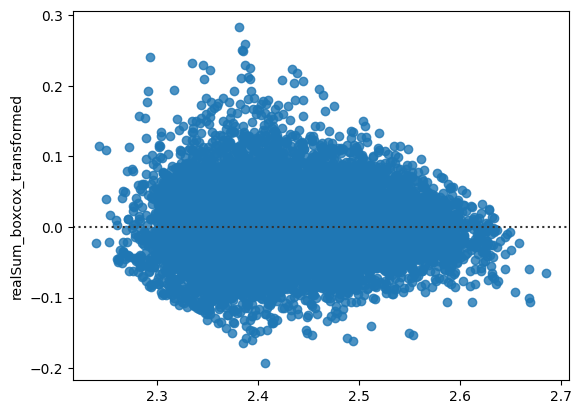

In [41]:
residuals = y_test - test_preds
sns.residplot(x=test_preds, y=residuals) 

In [42]:
transformed_train_preds = inv_boxcox(train_preds, fitted_y_lambda)
transformed_test_preds = inv_boxcox(test_preds, fitted_y_lambda)

print('Original train predictions', transformed_train_preds)
print('\n')
print('Original test predictions', transformed_test_preds)

Original train predictions [226.72060149 129.50506426 157.57197553 ... 201.2959739  581.17822689
 161.77984169]


Original test predictions [413.6814152  254.80159188 288.16775421 ... 198.96109331 215.48833816
 156.46866633]


In [43]:
original_train_y = inv_boxcox(y_train, fitted_y_lambda)
original_test_y = inv_boxcox(y_test, fitted_y_lambda)

In [44]:
original_train_error = np.sqrt(mean_squared_error(original_train_y, transformed_train_preds))
original_test_error = np.sqrt(mean_squared_error(original_test_y, transformed_test_preds))

print('Train RMSE in orignal units:', original_train_error)
print('Test RMSE in orignal units:', original_test_error)

Train RMSE in orignal units: 119.70445689572406
Test RMSE in orignal units: 119.80552001999583


In [46]:
comparative_errors.loc[len(comparative_errors)] = ['Test RMSE Lasso', original_test_error]
comparative_errors

,Metric,Value
0,Test RMSE Base,115.508
1,Test RMSE Ridge,115.154
2,Test RMSE Lasso,119.806
3,Test RMSE Lasso,119.806


### Elastic Net

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
poly_converter = PolynomialFeatures(degree = 2, include_bias=False)
X_train = poly_converter.fit_transform(X_train)
X_test = poly_converter.transform(X_test)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

elastic_net = ElasticNet() 
param_grid = {
    'alpha': [0.01, 0.1, 1, 5, 10, 50, 100],
    'l1_ratio': [0.1, 0.5, 0.7, 0.9, .95, 1.0]

}
grid_search = GridSearchCV(estimator=elastic_net, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_alpha = grid_search.best_params_['alpha']
best_l1 = grid_search.best_params_['l1_ratio']
print(f'Best alpha value: {best_alpha}')

elastic_model = ElasticNet(alpha = best_alpha, l1_ratio=best_l1)
elastic_model.fit(X_train, y_train)

train_preds = elastic_model.predict(X_train)
test_preds = elastic_model.predict(X_test)

test_rmse = np.sqrt(mean_squared_error(y_test, test_preds))
train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))
print('Train RMSE', train_rmse)
print('Test RMSE', test_rmse)

Best alpha value: 0.01
Train RMSE 0.04641313403347611
Test RMSE 0.04642323032537389


In [48]:
train_r2 = r2_score(y_train, train_preds)
test_r2 = r2_score(y_test, test_preds)
print(train_r2)
print(test_r2)

0.6982904165434758
0.6988929353985209


<Axes: ylabel='realSum_boxcox_transformed'>

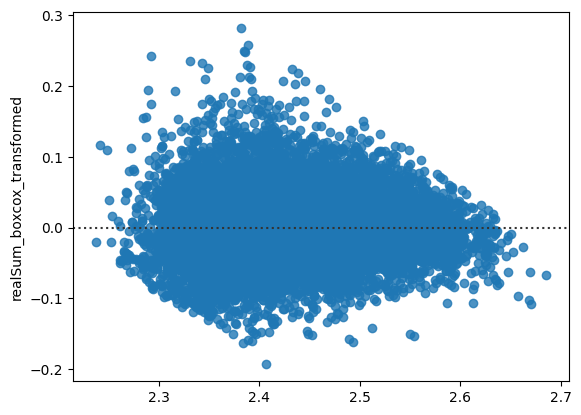

In [49]:
residuals = y_test - test_preds
sns.residplot(x=test_preds, y=residuals) 

In [50]:
transformed_train_preds = inv_boxcox(train_preds, fitted_y_lambda)
transformed_test_preds = inv_boxcox(test_preds, fitted_y_lambda)

print('Original train predictions', transformed_train_preds)
print('\n')
print('Original test predictions', transformed_test_preds)

Original train predictions [226.75512768 129.22668403 158.4035659  ... 201.31540907 569.83666104
 162.74605796]


Original test predictions [411.61560525 254.65901419 287.66759589 ... 198.62189305 215.0676335
 157.29488268]


In [51]:
original_train_y = inv_boxcox(y_train, fitted_y_lambda)
original_test_y = inv_boxcox(y_test, fitted_y_lambda)
original_train_error = np.sqrt(mean_squared_error(original_train_y, transformed_train_preds))
original_test_error = np.sqrt(mean_squared_error(original_test_y, transformed_test_preds))

print('Train RMSE in orignal units:', original_train_error)
print('Test RMSE in orignal units:', original_test_error)

Train RMSE in orignal units: 120.14292598712507
Test RMSE in orignal units: 120.06449066767942


In [52]:
comparative_errors.loc[len(comparative_errors)] = ['Test RMSE Elastic Net', original_test_error]


In [53]:
comparative_errors

,Metric,Value
0,Test RMSE Base,115.508
1,Test RMSE Ridge,115.154
2,Test RMSE Lasso,119.806
3,Test RMSE Lasso,119.806
4,Test RMSE Elastic Net,120.064
